# Problem 1 (30 Points)

During the lecture you worked with pipelines in SciKit-Learn to perform feature transformation before classification/regression using a pipeline. In this problem, you will look at another scaling method in a 2D regression context.

*You are welcome to use any of the code provided in the lecture activities.*

#### Summary of deliverables:
Sklearn Models (no scaling): Print Train and Test MSE
- Linear Regression (input degree 8 features)
- SVR, C = 1000
- KNN, K = 4
- Random Forest, 100 estimators of max depth 10  

Sklearn Pipeline (scaling + model): Print Train and Test MSE
- Linear Regression (input degree 8 features)
- SVR, C = 1000
- KNN, K = 4
- Random Forest, 100 estimators of max depth 10  

Plots
- 1x5 subplot showing model predictions on unscaled features, next to ground truth
- 1x5 subplot showing pipeline predictions with features scaled, next to ground truth

Questions
- Respond to the prompts at the end

In [204]:
import numpy as np
import matplotlib.pyplot as plt


from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import PolynomialFeatures, QuantileTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def plot(X, y, title=""):
    plt.scatter(X[:,0],X[:,1],c=y,cmap="jet")
    plt.colorbar(orientation="horizontal")
    plt.xlabel("$x_1$")
    plt.ylabel("$x_2$")
    plt.title(title)

## Load the data

Complete the loading process below by inputting the path to the data file "w6-p1-data.npy"

Training data is in `X_train` and `y_train`.
Testing data is in `X_test` and `y_test`.

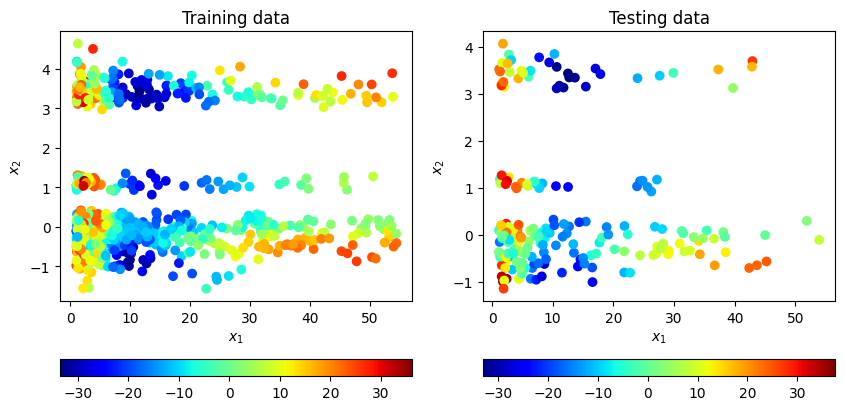

In [205]:
# YOUR CODE GOES HERE
# Define path
data = np.load("data/w6-p1-data.npy")
X, y = data[:,:2], data[:,2]
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=int(0.8*len(y)),random_state=0)

plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plot(X_train, y_train, "Training data")
plt.subplot(1,2,2)
plot(X_test, y_test, "Testing data")
plt.show()

## Models (no input scaling)
Fit 4 models to the training data:
- `LinearRegression()`. This should be a pipeline whose first step is `PolynomialFeatures()` with degree 7.
- `SVR()` with C = 1000 and "rbf" kernel
- `KNeighborsRegressor()` using 4 nearest neighbors
- `RandomForestRegressor()` with 100 estimators of max depth 10

Print the Train and Test MSE for each

In [206]:
model_names = ["LSR", "SVR", "KNN", "RF"]

# YOUR CODE GOES HERE
# linear regression model with polynomial features of degree 7
LSR = Pipeline([("poly", PolynomialFeatures(degree=7)), ("reg", LinearRegression())])
# SVR model with rbf kernel and c = 1000
SVR = SVR(kernel="rbf", C=1000)
# KNN model with 4 neighbors
KNN = KNeighborsRegressor(n_neighbors=4)
# Random forest model with 100 estimator and max depth of 10
RF = RandomForestRegressor(n_estimators=100, max_depth=10, random_state=0)

# train the models and print train & test MSE
models = [LSR, SVR, KNN, RF]
for model in models:
    model.fit(X_train, y_train)
    train_pred = model.predict(X_train)
    test_pred = model.predict(X_test)
    print(f"{model_names[models.index(model)]} Train MSE: {mean_squared_error(y_train, train_pred)}")
    print(f"{model_names[models.index(model)]} Test MSE: {mean_squared_error(y_test, test_pred)}")
    print()

LSR Train MSE: 50.8663899566442
LSR Test MSE: 57.28650448965208

SVR Train MSE: 82.04352603565977
SVR Test MSE: 98.63319719407623

KNN Train MSE: 26.856498566141628
KNN Test MSE: 47.63617328402055

RF Train MSE: 6.045950294198362
RF Test MSE: 25.252061900335093



## Visualizing the predictions
Plot the predictions of each method on the testing data in a 1x5 subplot structure, with the ground truth values as the leftmost subplot.

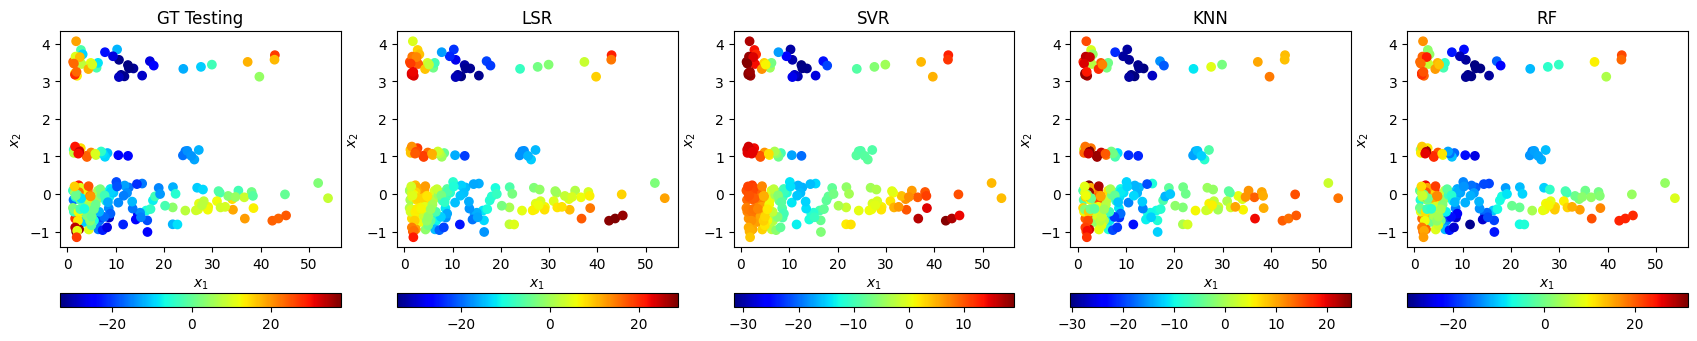

In [207]:
plt.figure(figsize=(21,4))
plt.subplot(1,5,1)
plot(X_test, y_test, "GT Testing")

# YOUR CODE GOES HERE
for model in models:
    plt.subplot(1,5,models.index(model)+2)
    plot(X_test, model.predict(X_test), model_names[models.index(model)])

plt.show()

## Quantile Scaling

A `QuantileTransformer()` can transform the input data in a way that attempts to match a given distribution (uniform distribution by default).  
- Create a quantile scaler with `n_quantiles = 800`.
- Then, create a pipeline for each of the 4 types of models used earlier
- Fit each pipeline to the training data, and again print the train and test MSE

In [208]:
pipeline_names = ["LSR Scaled", "SVR Scaled", "KNN Scaled", "RF Scaled"]

# YOUR CODE GOES HERE
# quantile scaler with n_quantiles = 800
quantile_scaler = QuantileTransformer(n_quantiles=800)
# pipeline for 4 models used earlier
pipelines = [Pipeline([("quantile", quantile_scaler), ("LSR", LSR)]), Pipeline([("quantile", quantile_scaler), ("SVR", SVR)]), Pipeline([("quantile", quantile_scaler), ("KNN", KNN)]), Pipeline([("quantile", quantile_scaler), ("RF", RF)])]

# train the models and print train & test MSE
for pipeline in pipelines:
    pipeline.fit(X_train, y_train)
    train_pred = pipeline.predict(X_train)
    test_pred = pipeline.predict(X_test)
    print(f"{pipeline_names[pipelines.index(pipeline)]} Train MSE: {mean_squared_error(y_train, train_pred)}")
    print(f"{pipeline_names[pipelines.index(pipeline)]} Test MSE: {mean_squared_error(y_test, test_pred)}")
    print()

LSR Scaled Train MSE: 39.52893428670415
LSR Scaled Test MSE: 43.20363492251461

SVR Scaled Train MSE: 41.03425800596019
SVR Scaled Test MSE: 43.01791573789873

KNN Scaled Train MSE: 19.687691313922564
KNN Scaled Test MSE: 36.397038931930005

RF Scaled Train MSE: 6.077215326436146
RF Scaled Test MSE: 25.190003357399775



## Visualization with scaled input
As before, plot the predictions of each *scaled* method on the testing data in a 1x5 subplot structure, with the ground truth values as the leftmost subplot.  

This time, for each plot, show the scaled data points instead of the original data. You can do this by calling `.transform()` on your quantile scaler. The scaled points should appear to follow a uniform distribution.

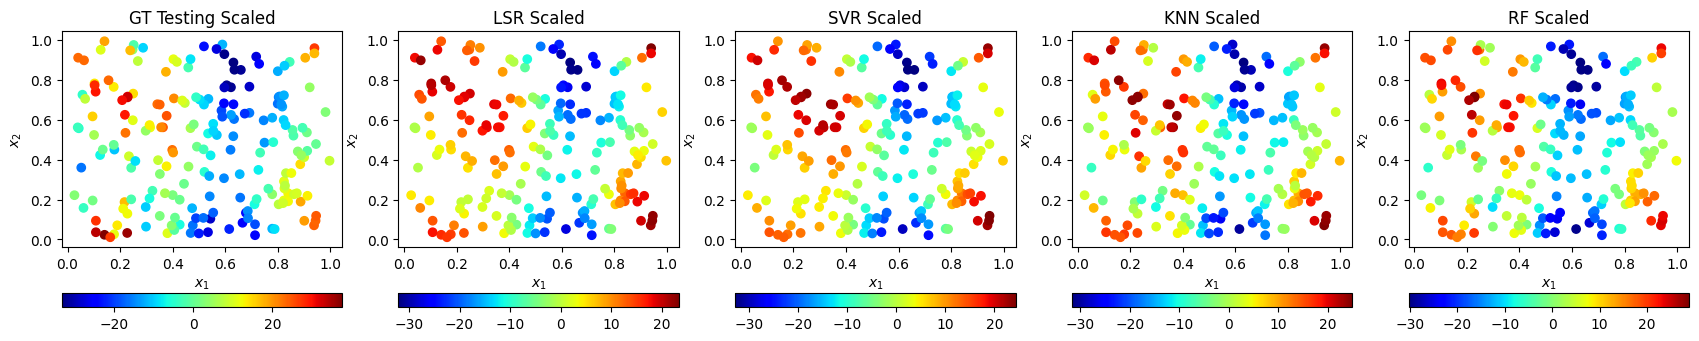

In [209]:
# YOUR CODE GOES HERE
# scale the test data
X_test_scaled = quantile_scaler.transform(X_test)
plt.figure(figsize=(21,4))
plt.subplot(1,5,1)
plot(X_test_scaled, y_test, "GT Testing Scaled")

# plot the predictions
for pipeline in pipelines:
    plt.subplot(1,5,pipelines.index(pipeline)+2)
    plot(X_test_scaled, pipeline.predict(X_test), pipeline_names[pipelines.index(pipeline)])
    
plt.show()

## Questions

1. Without transforming the input data, which model performed the best on test data? What about after scaling?  

    Without transforming the input data, the random forest regressor model performed the best on given test data.

    After scaling the input data, the random forest regressor model also performed the best on given test data.
    

2. For each method, say whether scaling the input improved or worsened, how extreme the change was, and why you think this is.

    For the linear regressor model, scaling the input improved the model's performance slightly. This is because linear regressors are sensitive to the scale of the features and helps 

    For the support vector regressor model, scaling the input improved the model's performance significantly. This is because support vector regressors rely on the distance between points, thus scaling the features can lead to great improvements in performance.

    For the K-nearest neighbor regressor model, scaling the input improved the model's performance slightly. This is because K-nearest neighbors compute the distance between points, and scaling the features can impact the performance.
     
    For the random forest regressor model, scaling the input had little to no change in the model's performance. This is because the random forest regressor relies on averaging the decision trees, which makes it less sensitive to the scale of the features.
